Step1: Import the packages

complete ML app with API and UI

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

Read the dataset using pandas

In [48]:
data = pd.read_csv("car.csv")
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


Basic EDA

In [49]:
data.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

In [50]:
data.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [51]:
print(data.describe())

              Year  Present_Price     Kms_Driven       Owner  Selling_Price
count   301.000000     301.000000     301.000000  301.000000     301.000000
mean   2013.627907       7.628472   36947.205980    0.043189       4.661296
std       2.891554       8.644115   38886.883882    0.247915       5.082812
min    2003.000000       0.320000     500.000000    0.000000       0.100000
25%    2012.000000       1.200000   15000.000000    0.000000       0.900000
50%    2014.000000       6.400000   32000.000000    0.000000       3.600000
75%    2016.000000       9.900000   48767.000000    0.000000       6.000000
max    2018.000000      92.600000  500000.000000    3.000000      35.000000


In [52]:
print(data.corr())

                   Year  Present_Price  Kms_Driven     Owner  Selling_Price
Year           1.000000      -0.047584   -0.524342 -0.182104       0.236141
Present_Price -0.047584       1.000000    0.203647  0.008057       0.878983
Kms_Driven    -0.524342       0.203647    1.000000  0.089216       0.029187
Owner         -0.182104       0.008057    0.089216  1.000000      -0.088344
Selling_Price  0.236141       0.878983    0.029187 -0.088344       1.000000


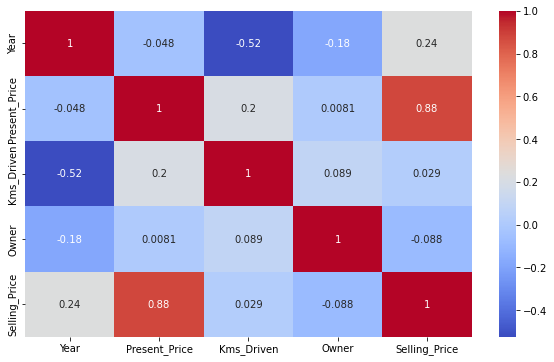

In [53]:
plt.figure(figsize=(10,6))
correlation = data.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.show()

In [54]:
data.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

In [55]:
le = LabelEncoder()
data['Fuel_Type']= le.fit_transform(data.Fuel_Type.values)
data['Transmission'] = le.fit_transform(data.Transmission.values)
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,2,Dealer,1,0,3.35
1,sx4,2013,9.54,43000,1,Dealer,1,0,4.75
2,ciaz,2017,9.85,6900,2,Dealer,1,0,7.25
3,wagon r,2011,4.15,5200,2,Dealer,1,0,2.85
4,swift,2014,6.87,42450,1,Dealer,1,0,4.60


In [56]:
data.Fuel_Type.unique()
data.Transmission.unique()
data.Owner.unique()

array([0, 1, 3], dtype=int64)

For our case Selling price is target feature and all other features are input features

In [57]:
predict = "Selling_Price"
finalData = data[['Year',  'Kms_Driven', 'Present_Price','Fuel_Type',
       'Transmission', 'Owner', 'Selling_Price']]    
print(finalData)

     Year  Kms_Driven  Present_Price  Fuel_Type  Transmission  Owner  \
0    2014       27000           5.59          2             1      0   
1    2013       43000           9.54          1             1      0   
2    2017        6900           9.85          2             1      0   
3    2011        5200           4.15          2             1      0   
4    2014       42450           6.87          1             1      0   
..    ...         ...            ...        ...           ...    ...   
296  2016       33988          11.60          1             1      0   
297  2015       60000           5.90          2             1      0   
298  2009       87934          11.00          2             1      0   
299  2017        9000          12.50          1             1      0   
300  2016        5464           5.90          2             1      0   

     Selling_Price  
0             3.35  
1             4.75  
2             7.25  
3             2.85  
4             4.60  
..       

In [58]:
x = np.array(finalData.drop([predict], 1))
y = np.array(finalData[predict])

C:\Users\crasanna\AppData\Local\Temp\ipykernel_29732\1281320686.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(finalData.drop([predict], 1))


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [60]:
y_train.shape

(240,)

Do the model building

In [61]:
lr_model = LinearRegression().fit(x_train, y_train)
dt_model = DecisionTreeRegressor().fit(x_train, y_train)
rf_model = RandomForestRegressor().fit(x_train, y_train)
gbm_model = GradientBoostingRegressor().fit(x_train, y_train)
lgbm_model = LGBMRegressor().fit(x_train, y_train)
xgb_model = XGBRegressor().fit(x_train, y_train)
catb_model = CatBoostRegressor().fit(x_train, y_train)

Learning rate set to 0.032678
0:	learn: 4.6255782	total: 941us	remaining: 941ms
1:	learn: 4.5505905	total: 1.94ms	remaining: 968ms
2:	learn: 4.4607799	total: 2.79ms	remaining: 926ms
3:	learn: 4.3760680	total: 3.63ms	remaining: 904ms
4:	learn: 4.2958098	total: 4.43ms	remaining: 882ms
5:	learn: 4.2270594	total: 5.26ms	remaining: 871ms
6:	learn: 4.1482190	total: 6.1ms	remaining: 865ms
7:	learn: 4.0618358	total: 6.88ms	remaining: 853ms
8:	learn: 3.9802406	total: 7.65ms	remaining: 842ms
9:	learn: 3.8979351	total: 8.38ms	remaining: 830ms
10:	learn: 3.8179310	total: 9.24ms	remaining: 830ms
11:	learn: 3.7493352	total: 9.96ms	remaining: 820ms
12:	learn: 3.6815431	total: 10.8ms	remaining: 820ms
13:	learn: 3.5981118	total: 12.1ms	remaining: 856ms
14:	learn: 3.5293381	total: 12.9ms	remaining: 849ms
15:	learn: 3.4648267	total: 13.7ms	remaining: 844ms
16:	learn: 3.3960592	total: 14.6ms	remaining: 841ms
17:	learn: 3.3403395	total: 15.3ms	remaining: 833ms
18:	learn: 3.2732310	total: 16.3ms	remaining: 

Evaluate Models
For evaluating various metrics can be used, here we are going to use MAE, MSE, RMSE, R2 Score, MAPE etc

In [62]:
def evaluate_model(model, x_test, y_test):
    predction = model.predict(x_test)
    print("Mean Absolute Error", mean_absolute_error(y_test, predction))
    print("Mean Absolute Percentage Eerror", mean_absolute_percentage_error(y_test, predction))
    print("Mean Square Error", mean_squared_error(y_test, predction))
    print("Root Mean Square Error", np.sqrt(mean_squared_error(y_test, predction)))
    print("R2 Score", r2_score(y_test, predction))

In [63]:
print("LR Model:")
print(evaluate_model(lr_model, x_test, y_test))
print("-----------------------------------------")
print("DecisionTree Regressor")
print(evaluate_model(dt_model, x_test, y_test))
print("-----------------------------------------")
print("RandomForest Regressor")
print(evaluate_model(rf_model, x_test, y_test))
print("-----------------------------------------")
print("GradientBoosting Regressor")
print(evaluate_model(gbm_model, x_test, y_test))
print("-----------------------------------------")
print("LGBM Regressor")
print(evaluate_model(lgbm_model, x_test, y_test))
print("-----------------------------------------")
print("XGB Regressor")
print(evaluate_model(xgb_model, x_test, y_test))
print("-----------------------------------------")
print("CatBoost Regressor")
print(evaluate_model(catb_model, x_test, y_test))

LR Model:
Mean Absolute Error 1.7199253201921316
Mean Absolute Percentage Eerror 2.52059344807985
Mean Square Error 11.625750493673412
Root Mean Square Error 3.4096554802022756
R2 Score 0.6982005456624427
None
-----------------------------------------
DecisionTree Regressor
Mean Absolute Error 1.1686885245901637
Mean Absolute Percentage Eerror 0.28181596351858895
Mean Square Error 12.64752950819672
Root Mean Square Error 3.5563365290979876
R2 Score 0.6716756043948218
None
-----------------------------------------
RandomForest Regressor
Mean Absolute Error 0.9015508196721312
Mean Absolute Percentage Eerror 0.2256971992761148
Mean Square Error 5.616941677377048
Root Mean Square Error 2.3700087926792697
R2 Score 0.8541866235473763
None
-----------------------------------------
GradientBoosting Regressor
Mean Absolute Error 0.8241827094697958
Mean Absolute Percentage Eerror 0.22695625601933567
Mean Square Error 8.005514793765409
Root Mean Square Error 2.829401843811764
R2 Score 0.792180298

In [64]:
print("CatBoost Regressor")
print(evaluate_model(catb_model, x_test, y_test))

CatBoost Regressor
Mean Absolute Error 0.9502020644853688
Mean Absolute Percentage Eerror 0.31401762378729153
Mean Square Error 10.335555231192073
Root Mean Square Error 3.214895835200897
R2 Score 0.7316934566291511
None


Prediction

In [65]:
predctions = catb_model.predict(x_test)
predctions

array([ 5.8708432 ,  4.9010342 ,  1.5038404 ,  3.16590825,  0.90964046,
        4.80013097,  0.33041111,  0.36221128,  4.73358961, 10.58415447,
        1.69269362,  6.86835806,  1.42582717,  4.1260251 ,  4.52911918,
       20.47988574,  1.8934035 ,  4.39324183,  2.98572652,  0.36747377,
        1.5929999 , 11.5525604 ,  8.70833562,  4.40258947,  0.19252934,
        0.48198455,  5.48282767,  7.42937717,  2.00004205,  1.31140785,
        6.94417862,  0.26070108, 22.5049969 ,  4.52148185,  8.25236724,
       10.36858654,  5.22747812, 10.83668538,  0.91103251,  0.15863715,
        5.61188899, 22.89145699,  3.14652716,  8.83972292,  0.90098401,
        4.18622325,  0.16312957,  0.78376614,  0.32738494,  3.17932836,
        9.72516711,  2.40566888,  5.19705871,  2.67084601,  4.5019494 ,
        1.10117234,  1.33738608,  9.46194677,  4.90703595,  2.65157849,
       10.7606281 ])

In [66]:
#Year',  'Kms_Driven', 'Present_Price','Fuel_Type','Transmission', 'Owner', 'Selling_Price
input = [[2016, 30000, 6.87, 1,1,0]]
price = catb_model.predict(input)
print("price=", price)

price= [5.94609775]


Save Model
inally save the model using pickle package, ou can use the pickle operation to serialize your machine learning algorithms 
and save the serialized format to a file.Later you can load this file to deserialize your model and use it to make new predictions.

In [67]:
import pickle
pickle.dump(catb_model, open("car_price_predictor_model.pkl", "wb"))